
# Linear Regression – How *m* and *b* Evolve + Evaluation Metrics

This notebook builds **deep intuition** by covering:

1. Linear Regression formula (Closed-form)
2. Linear Regression via Gradient Descent (SGD)
3. **Animation of how slope (m) and intercept (b) change**
4. Predictions using learned parameters
5. **Evaluation Metrics**:
   - MSE
   - MAE
   - RMSE
   - R²
   - Adjusted R²
6. When & why to use each metric (with formulas)

This notebook is intentionally **slow, visual, and explanatory**.



## 1. Dataset

We create a simple linear dataset:

### True equation:
\[ y = 2x + 3 \]


In [21]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [22]:

X = np.array([1,2,3,4,5]).reshape(-1,1)
y = 2 * X.flatten() + 3


In [23]:
X,y

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([ 5,  7,  9, 11, 13]))


## 2. Linear Regression (Closed‑Form Solution)

### Formula (Normal Equation):

\[
\theta = (X^T X)^{-1} X^T y
\]

This directly computes optimal **m and b** by minimizing squared error.


In [25]:

lr = LinearRegression()
lr.fit(X, y)

m_lr = lr.coef_[0]
b_lr = lr.intercept_

print("Slope (m):", m_lr)
print("Intercept (b):", b_lr)


Slope (m): 2.0
Intercept (b): 3.0


In [26]:
y_ = 2.0*23 + 3.0
print (y_)

49.0



## 3. Linear Regression using Gradient Descent

### Cost Function:
\[
J(m,b) = \frac{1}{n} \sum (y - (mx + b))^2
\]

### Parameter Updates:
\[
m := m - \alpha \frac{\partial J}{\partial m}
\]
\[
b := b - \alpha \frac{\partial J}{\partial b}
\]

Gradient Descent **iteratively moves m and b** to reduce loss.


In [28]:

learning_rate = 0.05
epochs = 30

m, b = 0.0, 0.0
m_history, b_history = [], []

for _ in range(epochs):
    y_pred = m * X.flatten() + b
    dm = (-2/len(X)) * sum(X.flatten() * (y - y_pred))
    db = (-2/len(X)) * sum(y - y_pred)

    m -= learning_rate * dm
    b -= learning_rate * db

    m_history.append(m)
    b_history.append(b)



## 4. Animation: How *m* and *b* Change Over Iterations

Watch how the regression line **slowly rotates and shifts** to fit data.


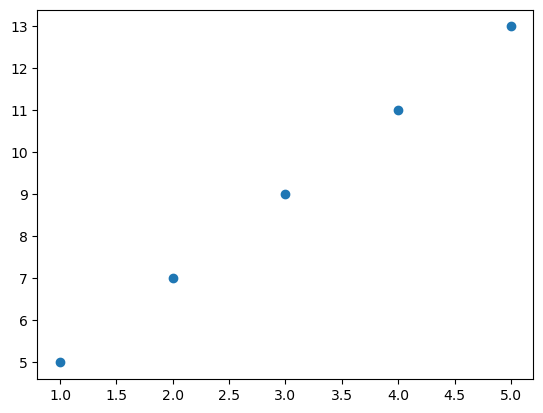

In [30]:

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ax.scatter(X, y)

line, = ax.plot([], [], color='red')

def update(frame):
    y_line = m_history[frame] * X.flatten() + b_history[frame]
    line.set_data(X.flatten(), y_line)
    ax.set_title(f"Iteration {frame+1} | m={m_history[frame]:.2f}, b={b_history[frame]:.2f}")
    return line,

ani = FuncAnimation(fig, update, frames=len(m_history), interval=300)
plt.show()



## 5. Prediction Using Learned Parameters

Prediction always follows:

\[ y = mx + b \]


In [32]:

X_new = np.array([6,7,8]).reshape(-1,1)
y_pred_lr = lr.predict(X_new)
y_pred_lr


array([15., 17., 19.])


## 6. Evaluation Metrics

### 1️⃣ Mean Squared Error (MSE)
\[
MSE = \frac{1}{n} \sum (y - \hat{y})^2
\]

- Penalizes large errors heavily
- Used when **large mistakes are costly**



### 2️⃣ Mean Absolute Error (MAE)
\[
MAE = \frac{1}{n} \sum |y - \hat{y}|
\]

- Robust to outliers
- Easy to interpret



### 3️⃣ Root Mean Squared Error (RMSE)
\[
RMSE = \sqrt{MSE}
\]

- Same unit as target variable
- Most common regression metric



### 4️⃣ R² Score (Coefficient of Determination)
\[
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
\]

- Measures **how much variance is explained**
- Range: (-∞, 1]
- Problem: **Always increases when features increase**



### 5️⃣ Adjusted R²
\[
Adjusted\ R^2 = 1 - (1-R^2)\frac{n-1}{n-p-1}
\]

Where:
- n = samples
- p = number of features

✔ Penalizes unnecessary features  
✔ Used in **feature selection**


In [38]:

y_train_pred = lr.predict(X)

mse = mean_squared_error(y, y_train_pred)
mae = mean_absolute_error(y, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_train_pred)

n = len(y)
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Adjusted R2:", adj_r2)


MSE: 0.0
MAE: 0.0
RMSE: 0.0
R2: 1.0
Adjusted R2: 1.0



## 🎯 Final Intuition

- **m and b are learned parameters**
- Gradient Descent *moves them step-by-step*
- Metrics explain **how good the line really is**
- R² explains variance
- Adjusted R² explains *useful variance*

If this makes sense → **ML fundamentals are solid**.
